<div style="
    border: 3px solid #0056b3;        /* Viền xanh đậm */
    border-radius: 10px;              /* Bo tròn góc */
    padding: 20px;
    margin: 20px 0;
    text-align: center;               /* Căn giữa toàn bộ nội dung */
    background-color: #e6f0ff;        /* Nền xanh nhạt */
    box-shadow: 5px 5px 10px #aaaaaa; /* Đổ bóng */
">
    <h1 style="color: #0056b3; margin-bottom: 5px;">
        ĐỒ ÁN CUỐI KÌ
    </h1>
    <h3 style="color: #333333; margin-top: 5px;">
        LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
    </h3>
</div>

<div style="
    margin-top: 20px;
    margin-bottom: 10px;
    padding-bottom: 5px;
    border-bottom: 4px solid #007bff; /* Thanh ngang màu xanh */
">
    <h2 style="color: #007bff; margin: 0; padding: 0;">
        SỬ DỤNG MODEL ĐỂ GIẢI QUYẾT BÀI TOÁN
    </h2>
</div>

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        Đọc dữ liệu
    </h3>
</div>

Import và cài đặt các thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Đọc dataset lưu trong file `online_shoppers_intention.csv` vào dataframe `data` và in ra 5 dòng đầu tiên.

In [ ]:
data = pd.read_csv("Data/online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<div style="
  margin: 28px 0 20px 0;
  padding: 14px 18px;
  border-left: 6px solid #2563eb;
  background-color: #eff6ff;
  border-radius: 6px;
  max-width: 90%;
">
  <h2 style="
    margin: 0;
    font-weight: 700;
    color: #1e3a8a;
  ">
    5. Làm thế nào để tối ưu hóa việc phân loại khách hàng bằng cách dự đoán khả năng mua hàng dựa trên sự tương tác giữa giá trị trang (Page Values) và các hành vi tương tác phi tuyến tính (Duration & Exit Rates) trong bối cảnh áp lực thời gian của các ngày lễ (Special Days)?
  </h2>
</div>



<div style="margin: 26px 0 18px 0;">
  <h3 style="
    margin: 0;
    font-weight: 700;
    padding-bottom: 6px;
    border-bottom: 3px solid #e5e7eb;
  ">
    I. Mục tiêu phân tích
  </h3>
</div>


Thay vì chỉ so sánh các mốc thời gian, phân tích này đi sâu vào việc tìm kiếm bằng chứng định lượng từ mô hình Machine Learning để giải thích:
- **Ngưỡng quyết định (The Tipping Point):** Tại giá trị nào của Page Values, xác suất một phiên truy cập chuyển từ "chỉ xem" sang "mua hàng" đạt mức bùng phát?
- **Sự đánh đổi giữa Thời gian và Hiệu quả:** Liệu việc khách hàng ở lại trang quá lâu (`High Duration`) là dấu hiệu của sự quan tâm sâu hay thực chất là biểu hiện của sự lưỡng lự/khó khăn trong tìm kiếm thông tin?
- **Tác động của Rào cản hành trình:** Tỷ lệ thoát (Exit Rates) tại các trang "ngõ cụt" (đỉnh 20%) làm giảm xác suất dự báo mua hàng của nhóm khách tiềm năng đến mức nào?
- **Sức mạnh dự báo của Biến số:** Trong một hệ thống nhiều biến số phi tuyến tính, yếu tố nào thực sự là "chìa khóa" giúp mô hình phân loại chính xác người mua thực sự?

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Vì sao cần phân tích vấn đề này?
  </h4>
</div>


Dữ liệu cho thấy "Red Flag" về hiện tượng **Window Shopping** và **Lạm phát số 0**. 
- Nếu chỉ nhìn vào số trang xem (`Product Related`), doanh nghiệp dễ đánh giá sai tiềm năng khách hàng, vì khi đó, khách hành có thể xem rất nhiều nhưng không mua.
- Dữ liệu tồn tại nhiều **Red Flags** như **lệch phải cực lớn** và **lạm phát số 0**, khiến các phép tính trung bình thông thường dễ gây hiểu lầm về hành vi thực tế.
- Làm rõ tại sao có những phiên truy cập có đầy đủ các dấu hiệu tương tác tốt nhưng vẫn không mang lại đơn hàng, từ đó nhận diện các rào cản tiềm ẩn.
- Hiểu rõ doanh nghiệp nên tập trung vào việc kéo dài thời gian lướt web (Content) hay tập trung vào việc tăng giá trị trang điều hướng (Conversion Path).

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Phân tích này mang lại giá trị/ insight gì?
  </h4>
</div>


- Cung cấp khả năng dự đoán ý định mua hàng để doanh nghiệp có thể can thiệp bằng các ưu đãi thời gian thực (real-time incentives).
- Cung cấp khả năng phân tách khách hàng thành các nhóm có chủ đích (**Goal-Oriented**) và khách hàng chỉ tham khảo (**Window Shoppers**) với độ chính xác cao dựa trên trọng số hành vi.
- Hiểu rõ "ngưỡng tương tác" (xem bao nhiêu trang, ở lại bao lâu) là đủ để một khách hàng mới (New Visitor) ra quyết định mua hàng so với khách hàng quay lại.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Ai cần quan tâm đến kết quả này?
  </h4>
</div>

- **Đội ngũ Marketing Growth:** Để hiểu rõ hành vi khách hàng mục tiêu, từ đó tối ưu hóa nội dung và thông điệp quảng cáo phù hợp với từng nhóm ý định.
- **Đội ngũ tối ưu hóa chuyển đổi (CRO):** Để hiểu rõ các biến số hành vi phi tuyến tính nào thực sự thúc đẩy doanh số.
- **Bộ phận trải nghiệm người dùng (UX/UI Designers)**: Để nhận diện và khắc phục các điểm đứt gãy hành trình tại các trang có tỷ lệ thoát cao (Exit Rate ~ 0.2), giúp cải thiện trải nghiệm người dùng.


<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Thông tin này ứng dụng vào vấn đề thực tế hoặc quyết định nào?
  </h4>
</div>

- Quyết định chỉ tập trung chi phí bám đuổi (retargeting) những khách hàng có điểm dự báo ý định mua hàng cao, giúp tiết kiệm ngân sách lãng phí cho nhóm người dùng chỉ có ý định tham khảo giá.
- Chuyển đổi từ chiến lược "giữ chân khách hàng lâu" (tăng Duration) sang chiến lược "điều hướng hiệu quả" (tăng Page Values) nếu mô hình cho thấy giá trị trang có trọng số dự báo lớn hơn. (tập trung vào việc dẫn dắt khách tới các trang có giá trị cao thay vì chỉ cố gắng giữ chân họ ở lại lâu một cách thụ động.)
- Kích hoạt các ưu đãi thời gian thực (real-time coupons) cho nhóm được mô hình dự báo là "Goal-Oriented" nhưng đang có dấu hiệu rời trang.
- Cải thiện thiết kế tại các trang "Critical Exit" để giảm thiểu mất mát doanh thu từ nhóm khách hàng tiềm năng.

<div style="margin: 26px 0 18px 0;">
  <h3 style="
    margin: 0;
    font-weight: 700;
    padding-bottom: 6px;
    border-bottom: 3px solid #e5e7eb;
  ">
    II. Giải quyết câu hỏi
  </h3>
</div>


<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    a. Tiền xử lý
  </h4>
</div>

Mục tiêu cốt lõi của giai đoạn này là chuyển hóa dữ liệu thô vốn chứa đựng nhiều khiếm khuyết thống kê (`Red Flags`) thành các đặc trưng có giá trị dự báo cao. Quy trình được thiết kế để đảm bảo mô hình phân loại (**Logistic Regression** và **Random Forest**) có thể học được các mẫu hình hành vi thực tế thay vì bị đánh lừa bởi các giá trị nhiễu.

Quy trình tiền xử lý bao gồm các bước chính sau:
**Bước 1: Xử lý lạm phát số 0 (Binary Transformation)**
* Áp dụng cho `Administrative`, `Informational`, và `Page Values`.
* Chuyển đổi thành biến chỉ báo (0/1) để mô hình tập trung vào việc xác định sự hiện diện của hành vi có chủ đích thay vì bị nhiễu bởi mật độ số 0 quá lớn.
* **Lý do**:
    * Hơn 75% dữ liệu tại các biến này là giá trị 0, việc giữ nguyên dạng số có thể khiến mô hình bị "thiên kiến", coi nhẹ các hành vi này. Biến đổi này giúp mô hình tập trung xác định sự hiện diện của "ý định" mua hàng thay vì bị nhiễu bởi mật độ số 0 quá lớn.
    
**Bước 2: Thuần hóa dữ liệu lệch và ngoại lai (Non-linear Transformation)**
* Áp dụng **$log(x+1)$** cho các toàn bộ các cột `Duration` (thời gian tương tác).
* **Lý do:**
  * Các biến thời gian bị lệch phải cực đại do sự xuất hiện của các ngoại lai (Bot hoặc người dùng treo máy lên tới 17 giờ). Log Transformation giúp nén dải giá trị cực đoan, làm phân phối bớt nhọn và gần với phân phối chuẩn hơn, giúp các thuật toán tối ưu hóa (như trong Logistic Regression) hội tụ tốt hơn.

**Bước 3: Xử lý tính chất đa đỉnh(Binning)**
* **Exit Rate:** Chia thành 2 nhóm Healthy và Critical để mô hình nhận diện rõ rào cản kỹ thuật.
* **Lý do:** Dữ liệu `Exit Rate` có đặc tính hai đỉnh (Bimodal). Việc rời rạc hóa giúp mô hình nhận diện rõ ranh giới giữa một phiên truy cập bình thường và một phiên bị đứt gãy do lỗi kỹ thuật hoặc rào cản nội dung tại ngưỡng 0.20.
  
<!-- * Chia **Product Related** thành các nhóm tương tác (Low, Medium, High) để chuyển các ngoại lai số lượng trang thành một đặc trưng có ý nghĩa. -->

**Bước 4: Chuẩn hóa thang đo (Scaling)**
* Sử dụng **RobustScaler**(dựa trên Median và IQR) để chuẩn hóa thang đo, đảm bảo các biến số không bị lệch hướng bởi các giá trị cực lớn sau khi Log.
  
**Bước 5: Encoding cho Special Day**
* **Thực hiện:** Gom nhóm thành các bậc ý nghĩa (Bình thường, Cận lễ, Cao điểm) kết hợp One-hot Encoding để bắt được trọng số độc lập của từng giai đoạn lễ hội.
* **Lý do:**
    * Giúp mô hình bắt được trọng số độc lập của từng giai đoạn lễ hội thay vì ép chúng vào một quan hệ tuyến tính không chính xác, , giải quyết "Red Flag" về tính phi quy luật của các ngày đặc biệt.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# 1. Định nghĩa các hàm chuyển đổi tùy chỉnh
def bin_special_day(x):
    """Gom nhóm SpecialDay thành 3 bậc ý nghĩa"""
    bins = [-0.1, 0.1, 0.7, 1.1]
    labels = ['Normal', 'Near-Festive', 'Peak-Festive']
    # Trả về dạng DataFrame để ColumnTransformer xử lý tiếp
    return pd.DataFrame(pd.cut(x.iloc[:, 0], bins=bins, labels=labels))

def bin_exit_rate(x):
    """Phân loại ExitRate thành Healthy và Critical (ngưỡng 0.2)"""
    bins = [-0.1, 0.19, 0.21]
    labels = ['Healthy', 'Critical']
    return pd.DataFrame(pd.cut(x.iloc[:, 0], bins=bins, labels=labels))

def binary_indicator(x):
    """Chuyển đổi thành biến chỉ báo 0/1 (x > 0)"""
    return (x > 0).astype(int)

# 2. Chuẩn bị dữ liệu
X = df.drop('Revenue', axis=1)
y = df['Revenue'].astype(int)

# Chia tập dữ liệu (80/20) với Stratify để giữ nguyên tỷ lệ Revenue
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# 3. Xây dựng Pipeline Tiền xử lý (Workflow Implementation)
log_transformer = Pipeline([
    ('log', FunctionTransformer(np.log1p)), # Xử lý lệch phải
    ('scaler', RobustScaler())             # Chuẩn hóa tránh ngoại lai
])

preprocessor = ColumnTransformer([
    # Bước 1 & 2: Log transform cho Duration và Binary cho tín hiệu quan trọng
    ('log_dur', log_transformer, ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']),
    ('binary', FunctionTransformer(binary_indicator), ['Administrative', 'Informational', 'PageValues']),
    
    # Bước 3 & 5: Binning và One-Hot Encoding cho các biến trạng thái
    ('special_day', Pipeline([
        ('bin', FunctionTransformer(bin_special_day)),
        ('onehot', OneHotEncoder())
    ]), ['SpecialDay']),
    
    ('exit_rate', Pipeline([
        ('bin', FunctionTransformer(bin_exit_rate)),
        ('onehot', OneHotEncoder())
    ]), ['ExitRates']),
    
    # Bước 4: Chuẩn hóa các biến số còn lại
    ('scaler', RobustScaler(), ['ProductRelated', 'BounceRates']),
    
    # Mã hóa các biến phân loại khác
    ('cat', OneHotEncoder(handle_unknown='ignore'), 
     ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'TrafficType'])
])

# Kiểm tra kích thước dữ liệu sau tiền xử lý
X_train_preprocessed = preprocessor.fit_transform(X_train)
print(f"Hình dạng dữ liệu sau tiền xử lý: {X_train_preprocessed.shape}")



Hình dạng dữ liệu sau tiền xử lý: (9764, 55)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, f1_score, confusion_matrix

# 1. Thiết lập 2 mô hình để so sánh (Lý do: LR để giải thích, RF để bắt quan hệ phi tuyến)
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

# 2. Huấn luyện mô hình
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# 3. Dự báo trên tập Test
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

# 4. Tính toán xác suất để vẽ đường cong Precision-Recall
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# 5. In báo cáo kết quả so sánh
print("======= LOGISTIC REGRESSION PERFORMANCE =======")
print(classification_report(y_test, y_pred_lr))

print("\n======= RANDOM FOREST PERFORMANCE =======")
print(classification_report(y_test, y_pred_rf))

# So sánh nhanh qua chỉ số F1-Score (trung bình điều hòa giữa Precision và Recall)
print(f"\nF1-Score Logistic Regression: {f1_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score Random Forest: {f1_score(y_test, y_pred_rf):.4f}")

======= LOGISTIC REGRESSION PERFORMANCE =======
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2059
           1       0.53      0.83      0.65       382

    accuracy                           0.86      2441
   macro avg       0.75      0.85      0.78      2441
weighted avg       0.90      0.86      0.87      2441


======= RANDOM FOREST PERFORMANCE =======
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2059
           1       0.70      0.48      0.57       382

    accuracy                           0.89      2441
   macro avg       0.81      0.72      0.75      2441
weighted avg       0.88      0.89      0.88      2441


F1-Score Logistic Regression: 0.6457
F1-Score Random Forest: 0.5736


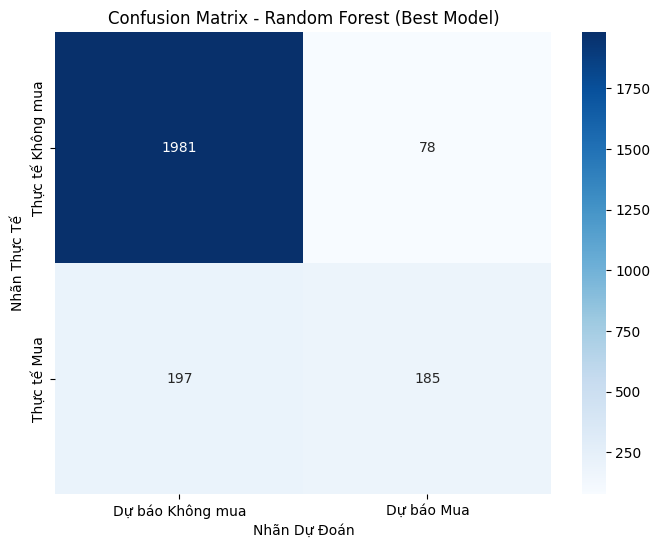

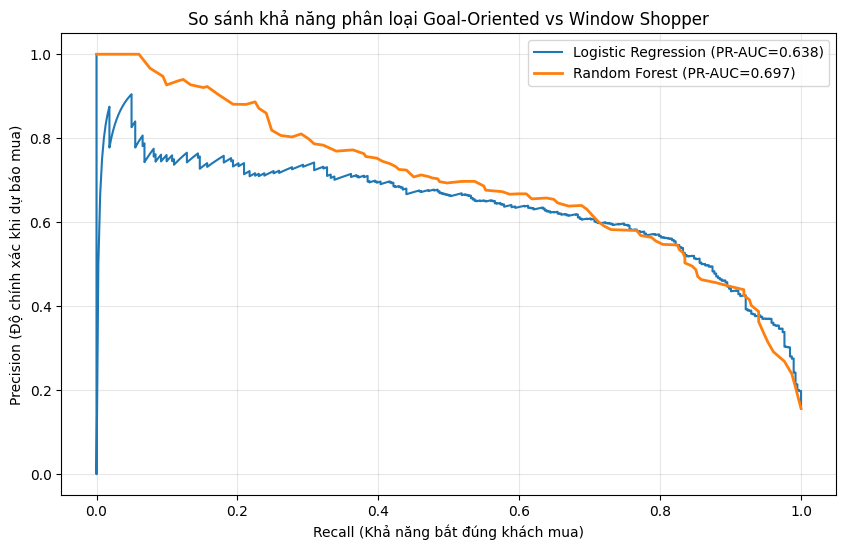

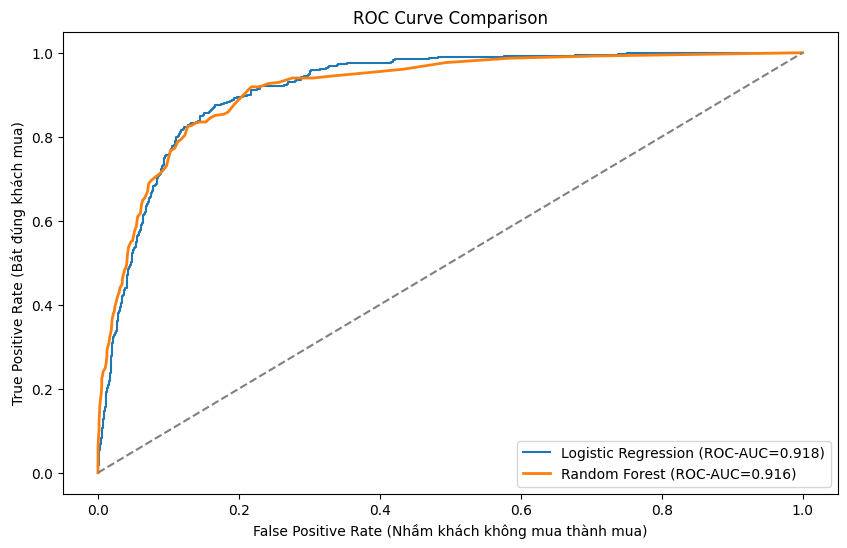

In [ ]:
# 1. Vẽ Confusion Matrix cho mô hình tốt nhất (Random Forest)
from sklearn.metrics import classification_report, precision_recall_curve, auc, f1_score, confusion_matrix, roc_curve

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Dự báo Không mua', 'Dự báo Mua'],
            yticklabels=['Thực tế Không mua', 'Thực tế Mua'])
plt.title('Confusion Matrix - Random Forest (Best Model)')
plt.xlabel('Nhãn Dự Đoán')
plt.ylabel('Nhãn Thực Tế')
plt.show()

# 2. Vẽ Precision-Recall Curve (Quan trọng cho dữ liệu mất cân bằng)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(10, 6))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (PR-AUC={auc(recall_lr, precision_lr):.3f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (PR-AUC={auc(recall_rf, precision_rf):.3f})', linewidth=2)
plt.xlabel('Recall (Khả năng bắt đúng khách mua)')
plt.ylabel('Precision (Độ chính xác khi dự báo mua)')
plt.title('So sánh khả năng phân loại Goal-Oriented vs Window Shopper')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Vẽ ROC Curve (Đánh giá khả năng phân tách của mô hình)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (ROC-AUC={auc(fpr_lr, tpr_lr):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (ROC-AUC={auc(fpr_rf, tpr_rf):.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # Đường baseline ngẫu nhiên
plt.xlabel('False Positive Rate (Nhầm khách không mua thành mua)')
plt.ylabel('True Positive Rate (Bắt đúng khách mua)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    b. Phân tích
  </h4>
</div>